In [1]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.3 MB/s eta 0:00:00


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


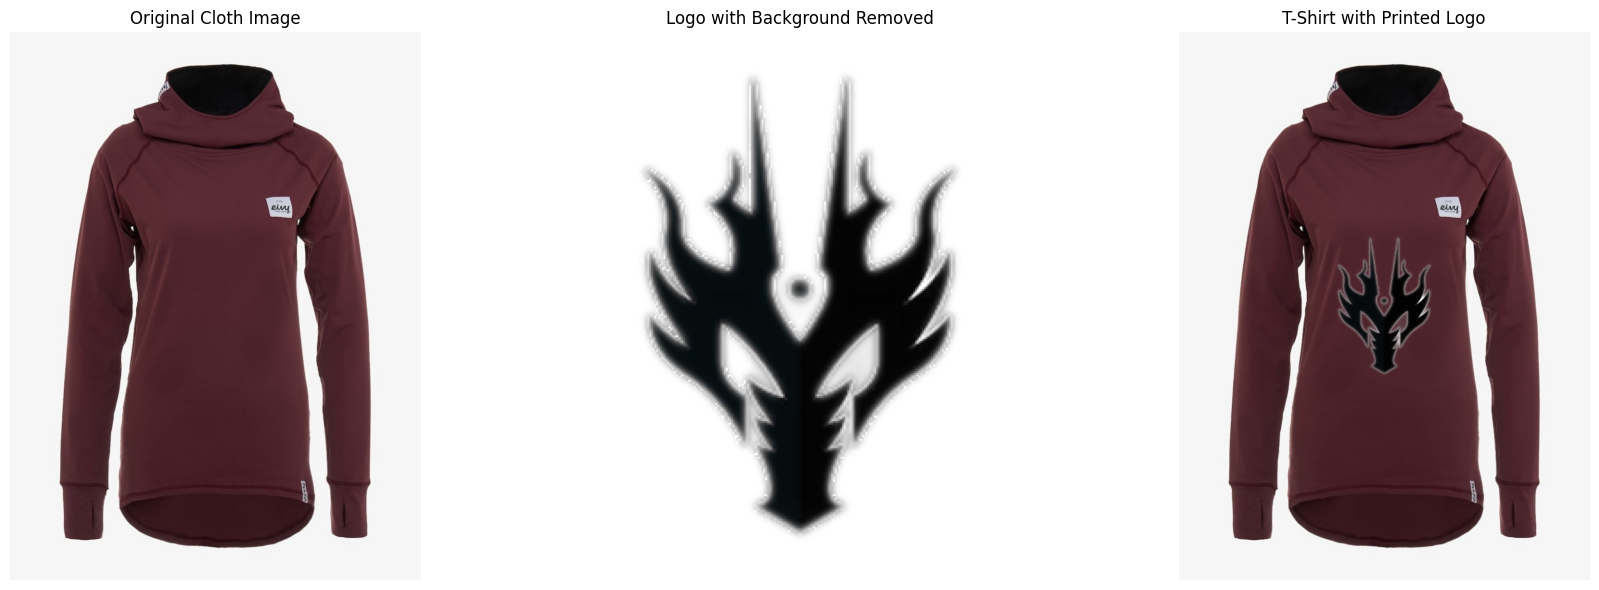

In [6]:
from google.colab import drive
drive.mount('/content/drive')

from rembg import remove
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

CLOTH_IMAGE_PATH = '/content/drive/MyDrive/00072_00.jpg'
LOGO_IMAGE_PATH = '/content/drive/MyDrive/DRAG.png'
RESULT_IMAGE_PATH = 'tshirt_with_logo.png'

with open(LOGO_IMAGE_PATH, 'rb') as i:
    input_data = i.read()
    result_data = remove(input_data)
    with open('logo_no_bg.png', 'wb') as o:
        o.write(result_data)
logo_img = Image.open('logo_no_bg.png').convert('RGBA')

cloth_img = Image.open(CLOTH_IMAGE_PATH).convert('RGBA')
shirt_w, shirt_h = cloth_img.size

logo_max_width = int(shirt_w * 0.4)
logo_aspect = logo_img.width / logo_img.height
logo_height = int(logo_max_width / logo_aspect)
logo_resized = logo_img.resize((logo_max_width, logo_height), Image.LANCZOS)
pos_x = (shirt_w - logo_max_width) // 2
pos_y = (shirt_h - logo_height) // 2

logo_arr = np.array(logo_resized)
alpha = logo_arr[:, :, 3]
alpha_blur = gaussian_filter(alpha, sigma=2)
logo_arr[:, :, 3] = alpha_blur
logo_blurred = Image.fromarray(logo_arr)

output_img = cloth_img.copy()
output_img.paste(logo_blurred, (pos_x, pos_y), logo_blurred)
output_img.save(RESULT_IMAGE_PATH)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(cloth_img)
axs[0].set_title("Original Cloth Image")
axs[0].axis('off')

white_bg = Image.new('RGBA', logo_resized.size, (255,255,255,255))
white_bg.paste(logo_blurred, (0,0), logo_blurred)
axs[1].imshow(white_bg)
axs[1].set_title("Logo with Background Removed")
axs[1].axis('off')

axs[2].imshow(output_img)
axs[2].set_title("T-Shirt with Printed Logo")
axs[2].axis('off')

plt.tight_layout()
plt.show()
